In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('../data/output/test_metrics_donoterase.csv', converters={
    'size_of_solutions_for_n_trials': pd.eval,
    'avg_score_over_each_trial': pd.eval,
    'num_while_iters_for_each_trial': pd.eval}).iloc[1:, :]

df['num_ones'] = df.num_non_zero_feasible - df.num_non_zero_feasible_under_one

solver_time = df[df.solved_with_exhaustive == 'No'].solver_time
rand_time = df[df.solved_with_exhaustive == 'No'].random_rounding_time

print((np.sum(solver_time) + np.sum(rand_time)) / 60, 'minutes')

In [16]:
df[['budget', 'solver_time']].iloc[40:55, :]

,budget,solver_time
41,41,13.795865
42,42,15.658495
43,43,13.918684
44,44,15.544755
45,45,15.025303
46,46,13.551815
47,47,10.161636
48,48,9.822364
49,49,13.032559
50,50,10.963794


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

s = pd.read_csv('../data/output/test_metrics.csv', converters={
    'fractional_glop_vals': pd.eval}).iloc[0, :]

In [12]:
len(s['fractional_glop_vals'])

163

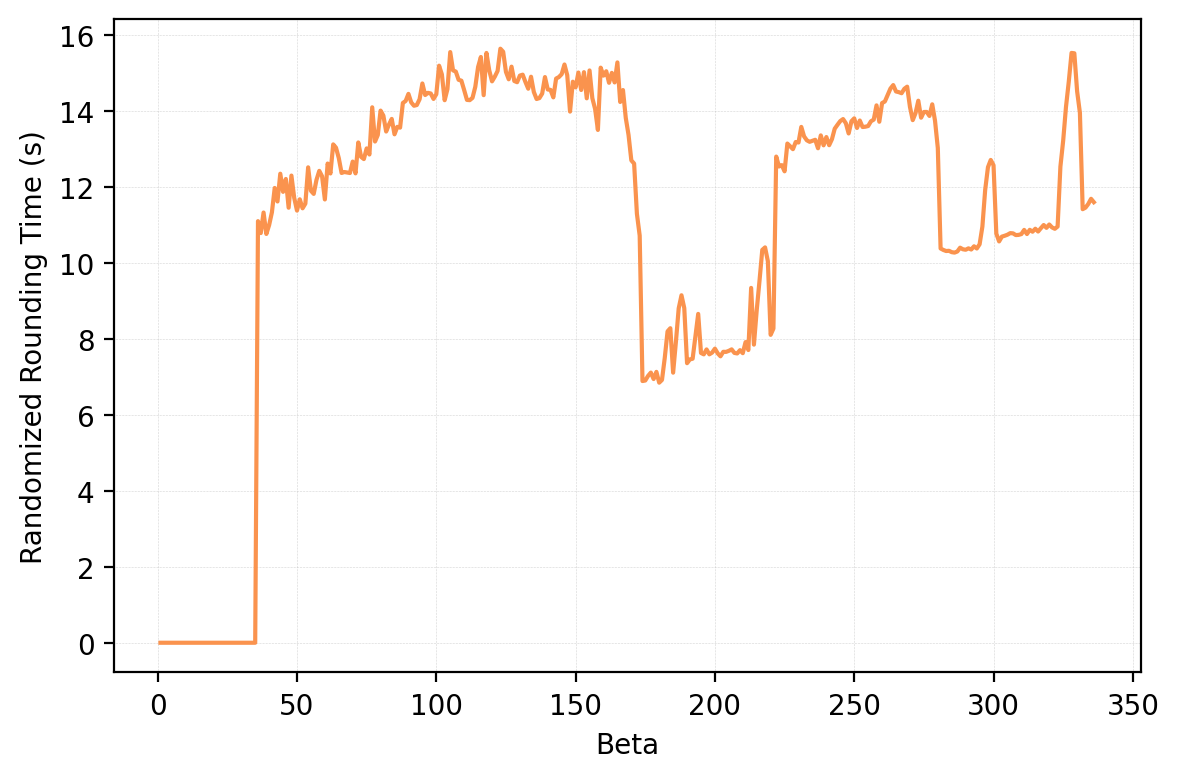

In [2]:
budget = df[df.solved_with_exhaustive == 'No'].budget
time = df[df.solved_with_exhaustive == 'No'].random_rounding_time

plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.autolayout"] = True

ax = sns.lineplot(x=budget, y=time, color='#fa934e')
ax.set(xlabel='Beta', ylabel='Randomized Rounding Time (s)')
ax.yaxis.grid(linestyle='dotted', linewidth=0.2)
ax.xaxis.grid(linestyle='dotted', linewidth=0.2)

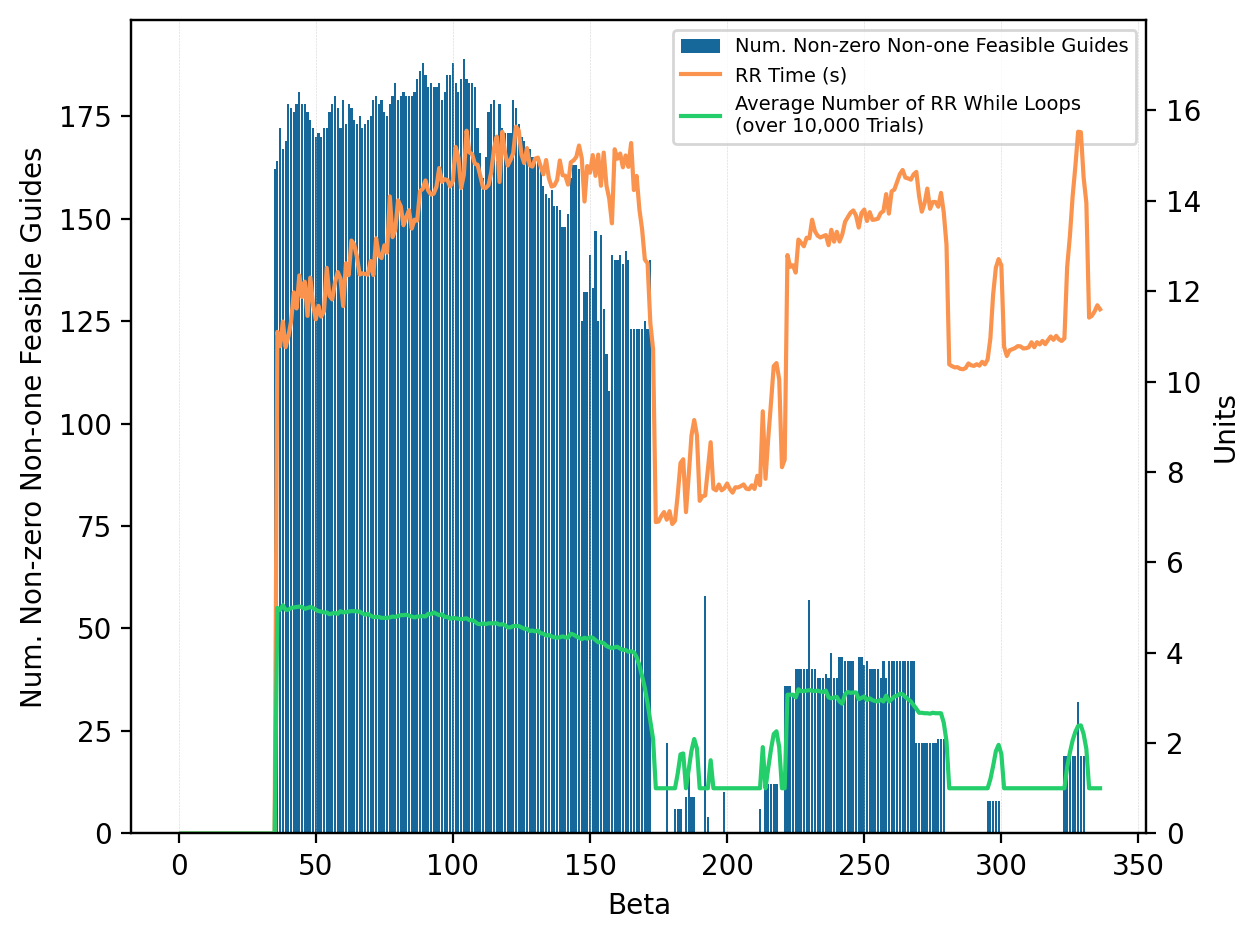

In [212]:
budget = df[df.solved_with_exhaustive == 'No'].budget
time = df[df.solved_with_exhaustive == 'No'].random_rounding_time
nz = df[df.solved_with_exhaustive == 'No'].num_non_zero_feasible_under_one
avg_while = df[df.solved_with_exhaustive == 'No'].avg_num_while_iters_for_n_trials

plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.autolayout"] = True

# plt.rcParams["figure.figsize"] = [6.4, 4.8]
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

ax1 = sns.barplot(x=budget, y=nz, color='#006db0', label='Num. Non-zero Non-one Feasible Guides')
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=budget, y=time, color='#fa934e', label='RR Time (s)')
ax3 = sns.lineplot(x=budget, y=avg_while, color='#23CE6B', label='Average Number of RR While Loops\n(over 10,000 Trials)')

ax1.set(xlabel='Beta', ylabel='Num. Non-zero Non-one Feasible Guides')
ax2.set(xlabel='Beta', ylabel='Units')
# ax3.set(xlabel='Beta', ylabel='Avg. Num. RR While Loops\n(over 10,000 Trials)')

# ax1.set_yticks(np.linspace(0, 207, 10))
ax2.set_yticks(np.linspace(0, 16, 9))

# ax1.yaxis.grid(linestyle='dotted', linewidth=0.2)
ax1.xaxis.grid(linestyle='dotted', linewidth=0.2)

# ax1.set_ylim(0, 207)
ax2.set_ylim(0, 18)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, prop={'size': 7})

ax1.set_label('Num. Non-zero Non-one Feasible Guides')

plt.xticks(ticks=np.linspace(0, 350, 8), labels=[str(int(s)) for s in np.linspace(0, 350, 8)])
plt.legend('', frameon=False)

plt.savefig('../data/output/triple_vs_beta.png')

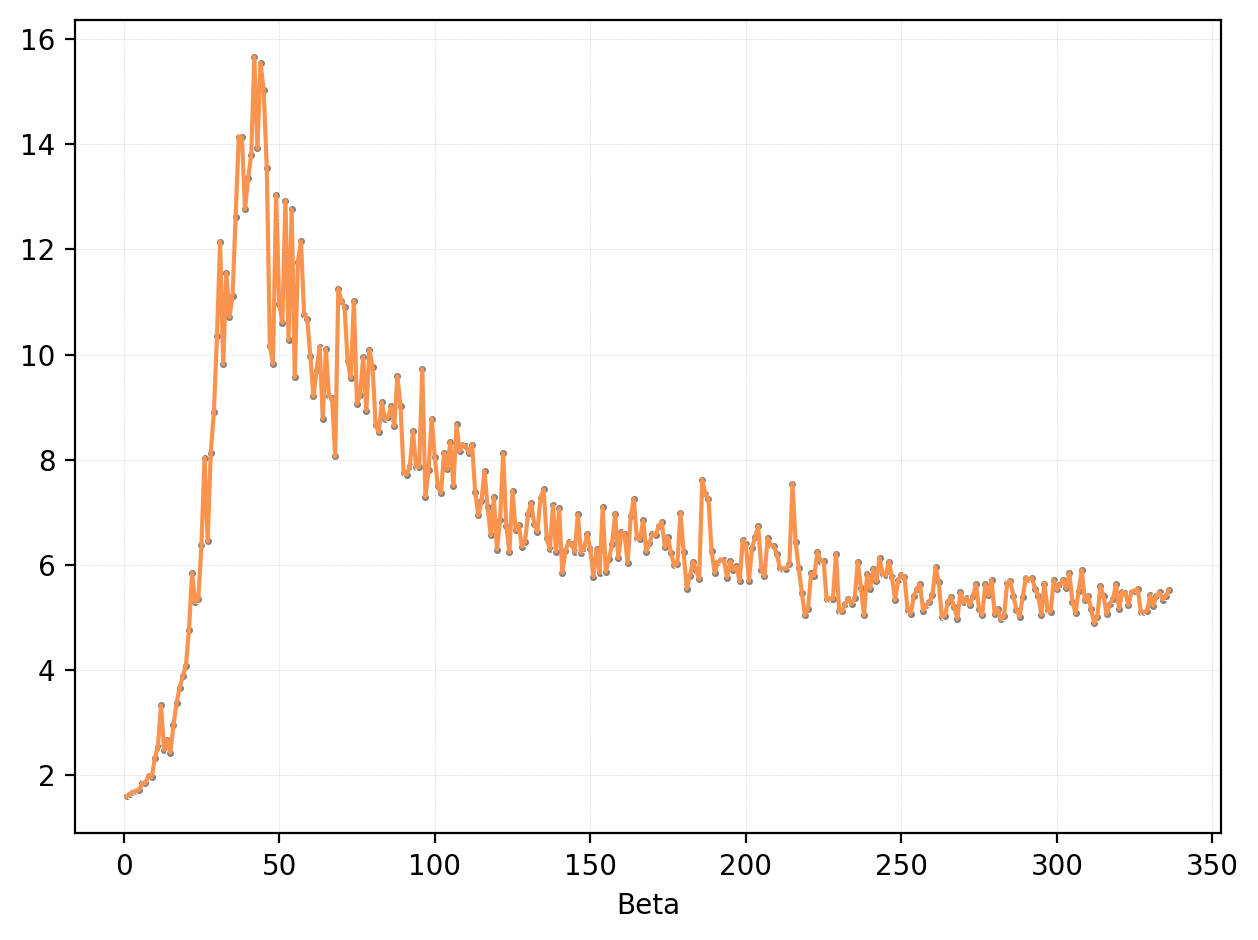

In [229]:
budget = df[df.solved_with_exhaustive == 'No'].budget
time = df[df.solved_with_exhaustive == 'No'].solver_time

plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.autolayout"] = True

ax = sns.scatterplot(x=budget, y=time, color='grey', marker='.')
ax = sns.lineplot(x=budget, y=time, color='#fa934e')
ax.set(xlabel='Beta', ylabel='')
ax.yaxis.grid(linestyle='dotted', linewidth=0.2)
ax.xaxis.grid(linestyle='dotted', linewidth=0.2)

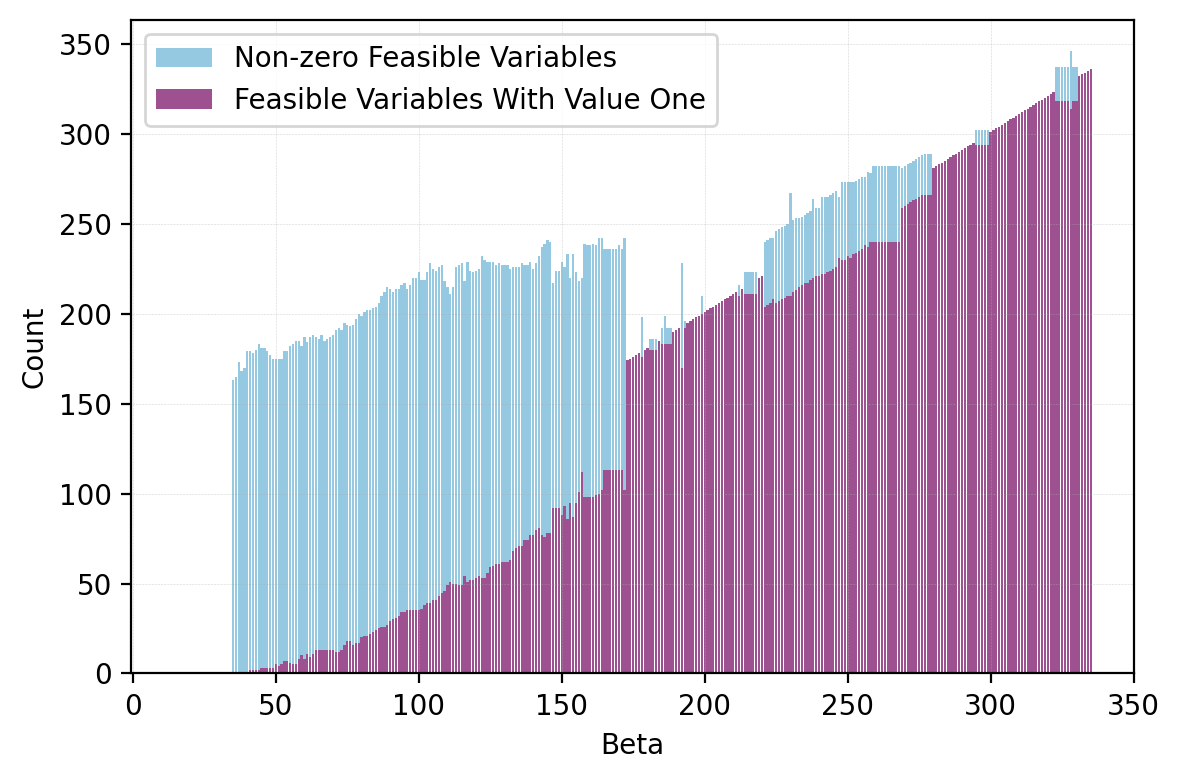

In [25]:
budget = df[df.solved_with_exhaustive == 'No'].budget
time = df[df.solved_with_exhaustive == 'No'].random_rounding_time

plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.autolayout"] = True

ax = sns.barplot(x=budget, y=df.num_non_zero_feasible, color='#88CCEE', label='Non-zero Feasible Variables')
# ax2 = ax.twinx()

# sns.lineplot(ax=ax2, x=budget, y=time, color='#fa934e', label='RR Time (s)', )

sns.barplot(
    ax=ax,
    x=budget,
    y=(df.num_non_zero_feasible - df.num_non_zero_feasible_under_one),
    color='#AA4499', label='Feasible Variables With Value One')

# ax2.set_yticks(np.linspace(0, 16, 9))
# ax2.set_ylim(0, 18)

ax.set(xlabel='Beta', ylabel='Count')
ax.yaxis.grid(linestyle='dotted', linewidth=0.2)
ax.xaxis.grid(linestyle='dotted', linewidth=0.2)

plt.xticks(ticks=np.linspace(0, 350, 8), labels=[str(int(s)) for s in np.linspace(0, 350, 8)]);
plt.legend()
plt.savefig('../data/output/nonint_ones_vs_beta.png')

In [1]:
every_five = df.iloc[::5, :]
# every_five = every_five.set_index('budget')
every_five.one = every_five.num_non_zero_feasible - every_five.num_non_zero_feasible_under_one

plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.autolayout"] = True
plt.xticks(fontsize=5, rotation=90)

ax = sns.barplot(x=every_five.budget, y=[every_five.num_non_zero_feasible, every_five.one], color='#006db0')

# sns.barplot(
#     ax=ax,
#     x=every_five.index,
#     y=(every_five.num_non_zero_feasible - every_five.num_non_zero_feasible_under_one),
#     color='pink')

ax.set(xlabel='Beta', ylabel='')
ax.yaxis.grid(linestyle='dotted', linewidth=0.2)
ax.xaxis.grid(linestyle='dotted', linewidth=0.2)

#plt.xticks(ticks=np.linspace(0, 350, 8), labels=[str(int(s)) for s in np.linspace(0, 350, 8)]);
# plt.savefig('../data/output/glop_vs_beta.png')

NameError: name 'df' is not defined

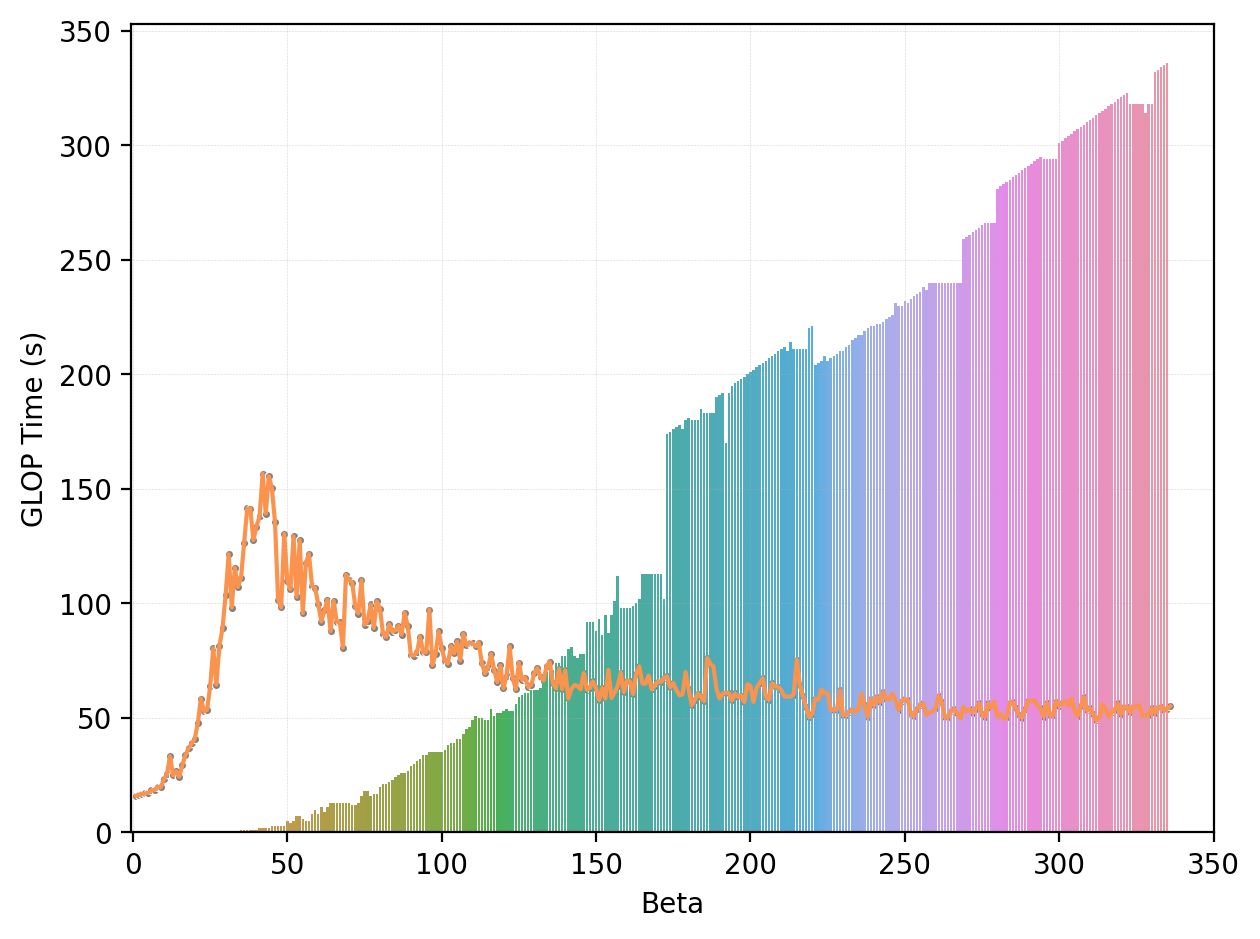

In [228]:
budget = df[df.solved_with_exhaustive == 'No'].budget
time = df[df.solved_with_exhaustive == 'No'].solver_time * 10

plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.autolayout"] = True

ax = sns.scatterplot(x=budget, y=time, color='grey', marker='.')
ax = sns.lineplot(x=budget, y=time, color='#fa934e')
sns.barplot(x=budget, y=(df.num_non_zero_feasible - df.num_non_zero_feasible_under_one))

ax.set(xlabel='Beta', ylabel='')
ax.yaxis.grid(linestyle='dotted', linewidth=0.2)
ax.xaxis.grid(linestyle='dotted', linewidth=0.2)

plt.xticks(ticks=np.linspace(0, 350, 8), labels=[str(int(s)) for s in np.linspace(0, 350, 8)]);
# plt.savefig('../data/output/glop_vs_beta.png')

## Why the dip above?
## because the time it takes depends on the number of feasible guides that are not guaranteed to be in the solution (those with a prob < 1)

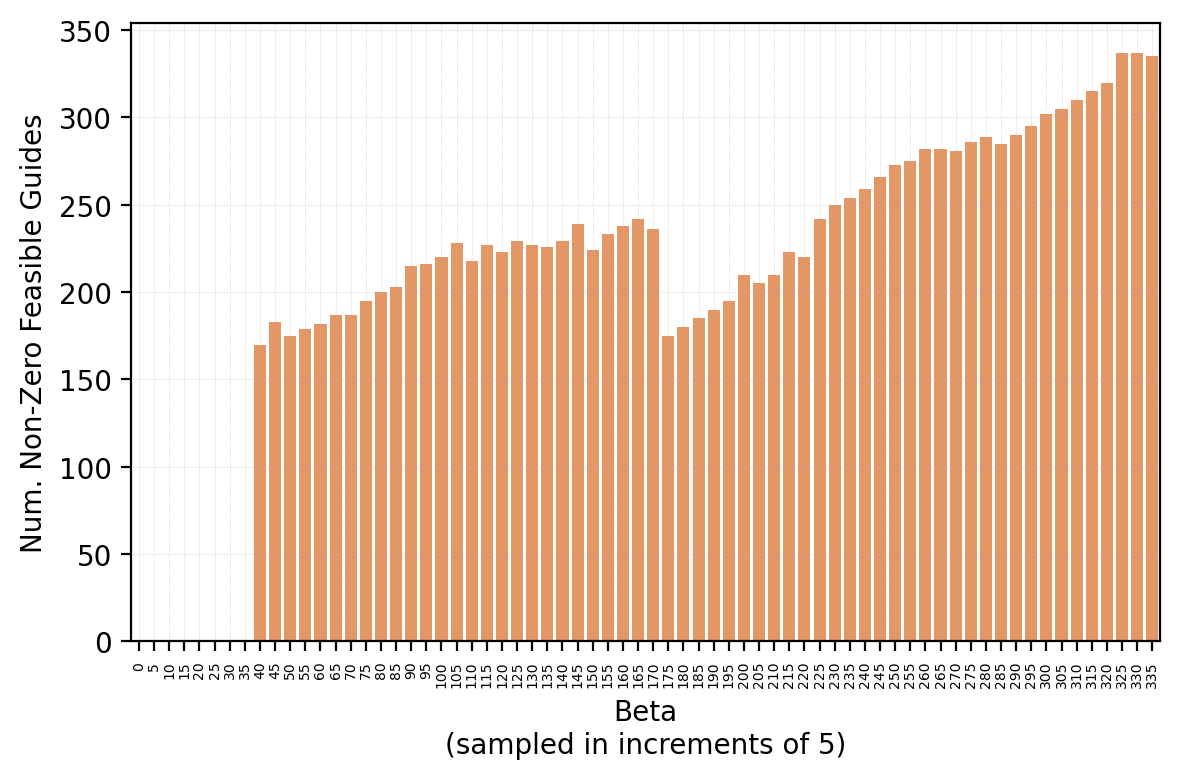

In [9]:
budget = df[df.solved_with_exhaustive == 'No'].budget
num_non_zero_feasible = df[df.solved_with_exhaustive == 'No'].num_non_zero_feasible

plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.autolayout"] = True

plt.xticks(fontsize=5, rotation=90)

every_five = df.iloc[::5, :]
every_five = every_five.set_index('budget')

ax = sns.barplot(data=every_five, x=every_five.index, y=every_five.num_non_zero_feasible, color='#fa934e')
ax.set(xlabel='Beta\n(sampled in increments of 5)', ylabel='Num. Non-Zero Feasible Guides')
ax.yaxis.grid(linestyle='dotted', linewidth=0.2)
ax.xaxis.grid(linestyle='dotted', linewidth=0.2)

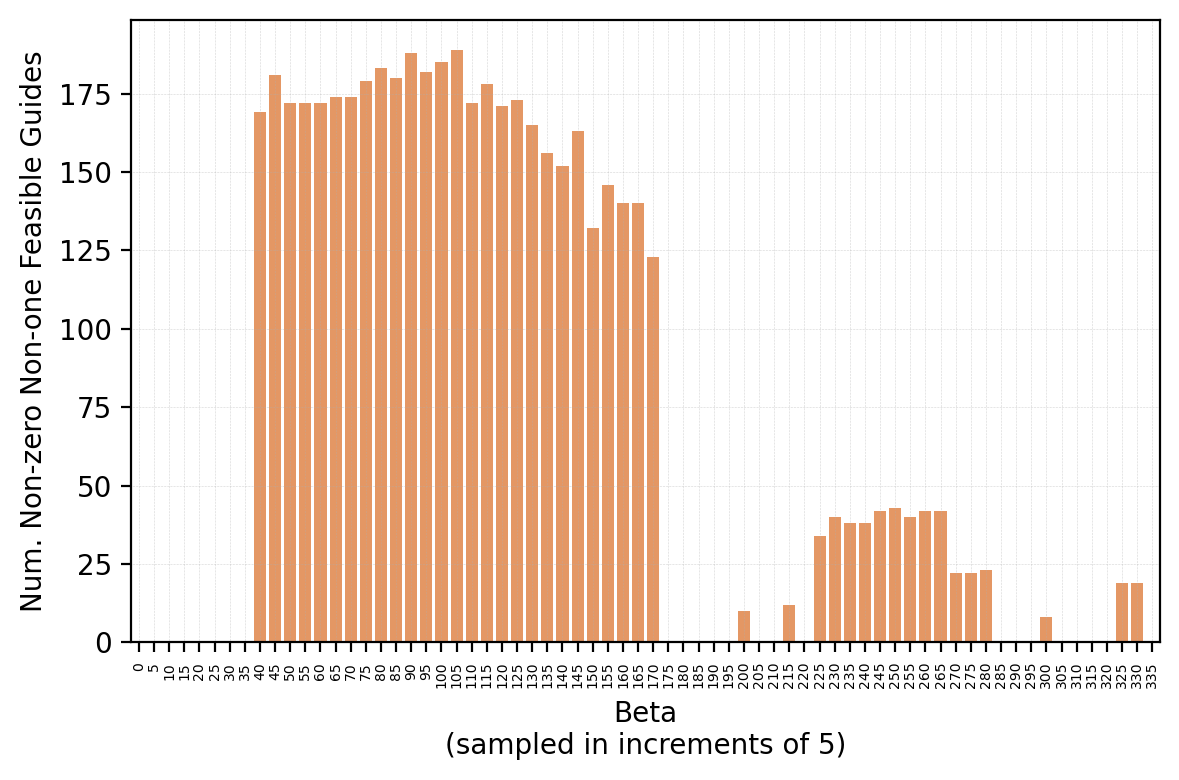

In [14]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.autolayout"] = True

plt.xticks(fontsize=5, rotation=90)

every_five = df.iloc[::5, :]
every_five = every_five.set_index('budget')

ax = sns.barplot(data=every_five, x=every_five.index, y=every_five.num_non_zero_feasible_under_one, color='#fa934e')
ax.set(xlabel='Beta\n(sampled in increments of 5)', ylabel='Num. Non-zero Non-one Feasible Guides')
ax.yaxis.grid(linestyle='dotted', linewidth=0.2)
ax.xaxis.grid(linestyle='dotted', linewidth=0.2)

<BarContainer object of 337 artists>

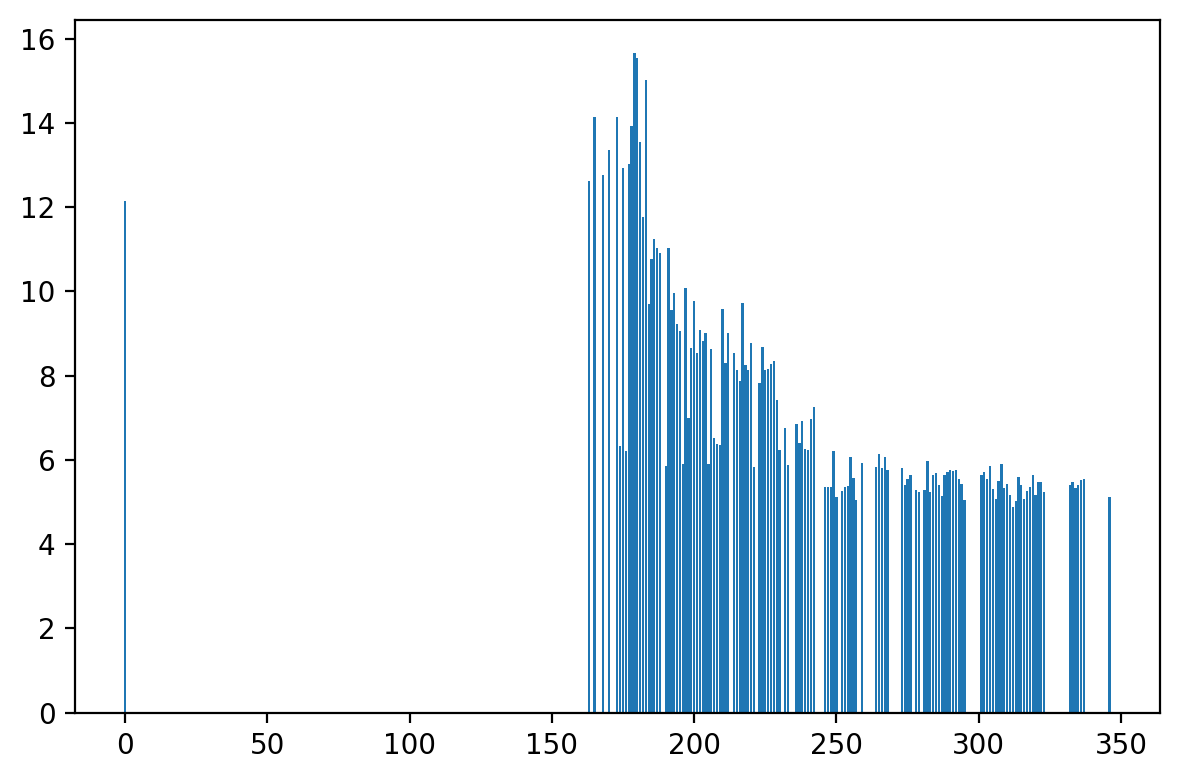

In [41]:
time = df[df.solved_with_exhaustive == 'No'].solver_time
budget = df[df.solved_with_exhaustive == 'No'].budget
num_feasible = df[df.solved_with_exhaustive == 'No'].num_non_zero_feasible

plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.autolayout"] = True

plt.bar(num_feasible, time)

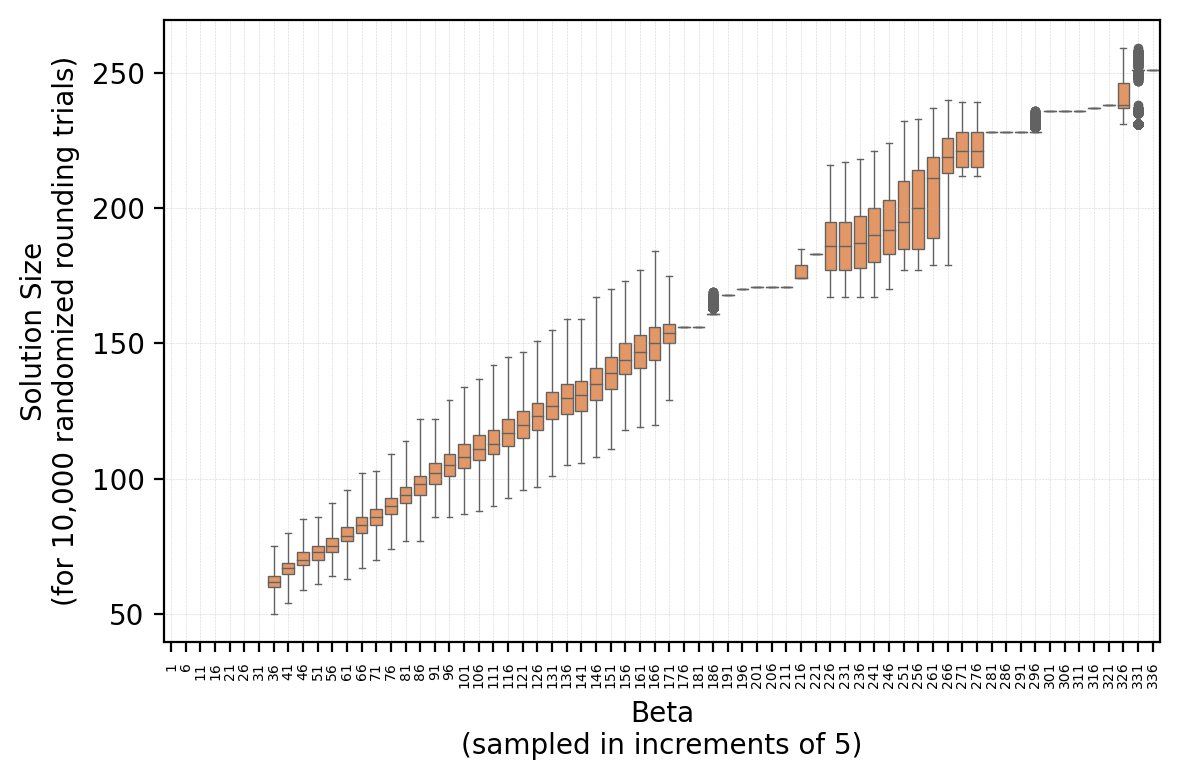

In [5]:
import seaborn as sns

every_ten = df.iloc[::5, :]
every_ten = every_ten.set_index('budget')

plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.autolayout"] = True

plt.xticks(fontsize=5, rotation=90)

mins = [min(col) if (len(col) > 0) else 0 for col in every_ten.size_of_solutions_for_n_trials ]


ax = sns.boxplot(
    every_ten.size_of_solutions_for_n_trials.apply(lambda x: pd.Series(x)).T,
    linewidth=0.5, whis=3,
    flierprops={'marker': '.'}, color='#fa934e')
ax.set(xlabel='Beta\n(sampled in increments of 5)', ylabel='Solution Size\n(for 10,000 randomized rounding trials)')
ax.yaxis.grid(linestyle='dotted', linewidth=0.2)
ax.xaxis.grid(linestyle='dotted', linewidth=0.2)

#sns.scatterplot(x=every_ten.index, y=mins, color='navy', marker='x')

plt.savefig('../data/output/size_vs_beta.pdf')

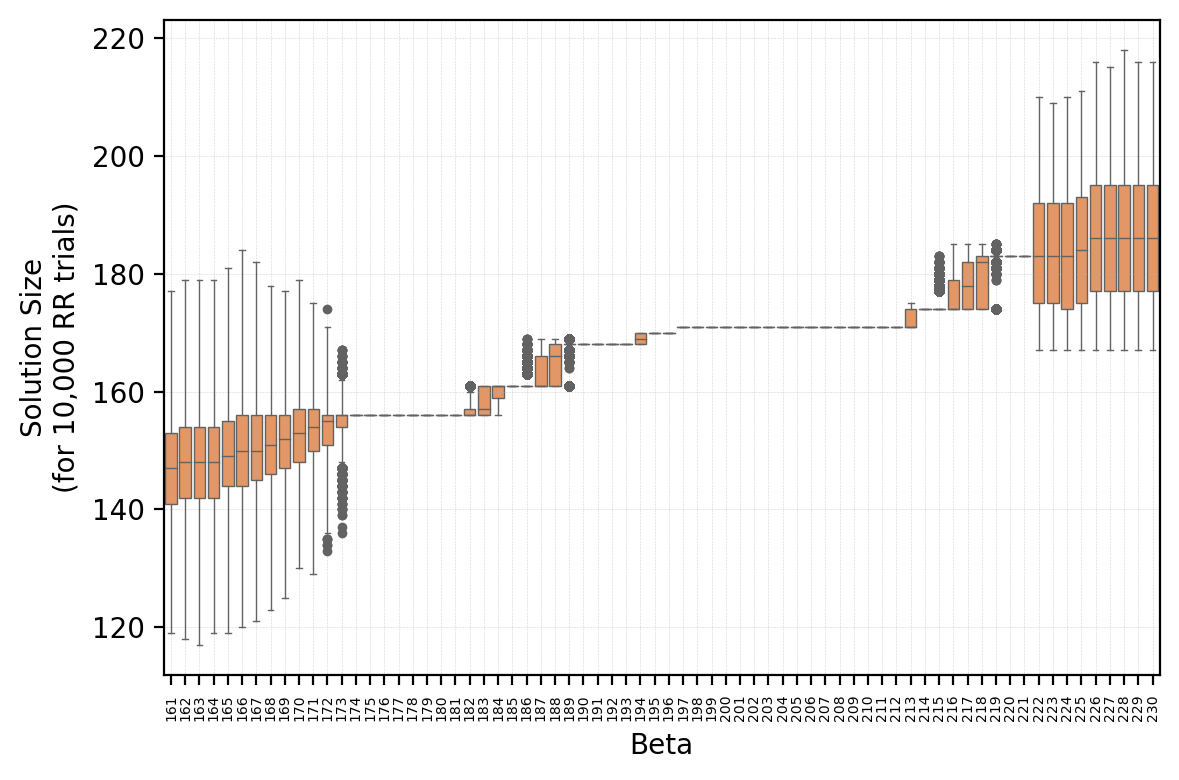

In [22]:
import seaborn as sns

every_ten = df.iloc[160:230, :]
every_ten = every_ten.set_index('budget')

plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.autolayout"] = True

plt.xticks(fontsize=5, rotation=90)

ax = sns.boxplot(
    every_ten.size_of_solutions_for_n_trials.apply(lambda x: pd.Series(x)).T,
    linewidth=0.5, whis=3,
    flierprops={'marker': '.'}, color='#fa934e')
ax.set(xlabel='Beta', ylabel='Solution Size\n(for 10,000 RR trials)')
ax.yaxis.grid(linestyle='dotted', linewidth=0.2)
ax.xaxis.grid(linestyle='dotted', linewidth=0.2)

#sns.scatterplot(x=every_ten.index, y=mins, color='navy', marker='x')

#plt.savefig('../data/output/size_vs_beta.png')

In [23]:
every_ten.iloc[13, :]

avg_score_over_all_trials                                                   81.414487
avg_score_over_each_trial           [81.41448717948715, 81.41448717948715, 81.4144...
avg_num_while_iters_for_n_trials                                                  1.0
num_while_iters_for_each_trial      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
solver_time                                                                  6.337167
exhaustive_time                                                                   0.0
random_rounding_time                                                         6.889612
num_non_zero_feasible                                                             174
num_non_zero_feasible_under_one                                                     0
num_exhausted_combos                                                                0
solved_with_exhaustive                                                             No
size_of_solutions_for_n_trials      [156, 156, 156, 15

See above: Beta is 174. num_non_zero_feasible is 174, and under_one is zero. This means all feasible solutions have a value of 1. But the size of the solutions are all 156. This means GLOP is covering some species more than once. This is not a surprise; we told it, as a constraint, to cover each species AT LEAST once. The guides that do not cover ANY new species are being left out in the randomized rounding step where I have an if-statement with the sets check. I should sort these guides by score. If there are two guides that cover 2 complementary sets of species and 1 guide that covers them all, do we optimize for size or efficiency?

In [24]:
every_ten.iloc[12, :]

avg_score_over_all_trials                                                   81.351718
avg_score_over_each_trial           [81.41448717948717, 81.07655405405403, 81.4144...
avg_num_while_iters_for_n_trials                                                 2.09
num_while_iters_for_each_trial      [2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, ...
solver_time                                                                   6.81449
exhaustive_time                                                                   0.0
random_rounding_time                                                        10.718236
num_non_zero_feasible                                                             242
num_non_zero_feasible_under_one                                                   140
num_exhausted_combos                                                                0
solved_with_exhaustive                                                             No
size_of_solutions_for_n_trials      [156, 148, 156, 15

In [30]:
print(max(every_ten.iloc[12, :].avg_score_over_each_trial))
x = np.argmax(every_ten.iloc[12, :].avg_score_over_each_trial)
print(x)
print(every_ten.iloc[12, :].size_of_solutions_for_n_trials[x])

81.64347305389221
6483
167


In [31]:
print(min(every_ten.iloc[12, :].size_of_solutions_for_n_trials))
x = np.argmin(every_ten.iloc[12, :].size_of_solutions_for_n_trials)
print(x)
print(every_ten.iloc[12, :].avg_score_over_each_trial[x])

136
6069
80.76022058823526


So, beta = 173 compared to beta = 174, we use 136 guides with score 80.76 for the former, and 174 guides with score 81.41 for the latter. 28 more guides for a score gain of 0.65 seems hardly worth it. How are people supposed to not fall in this "trap?" Without seeing the scores vs beta figure, this is impossible to guess unless I come up with a smarter way to define the problem.

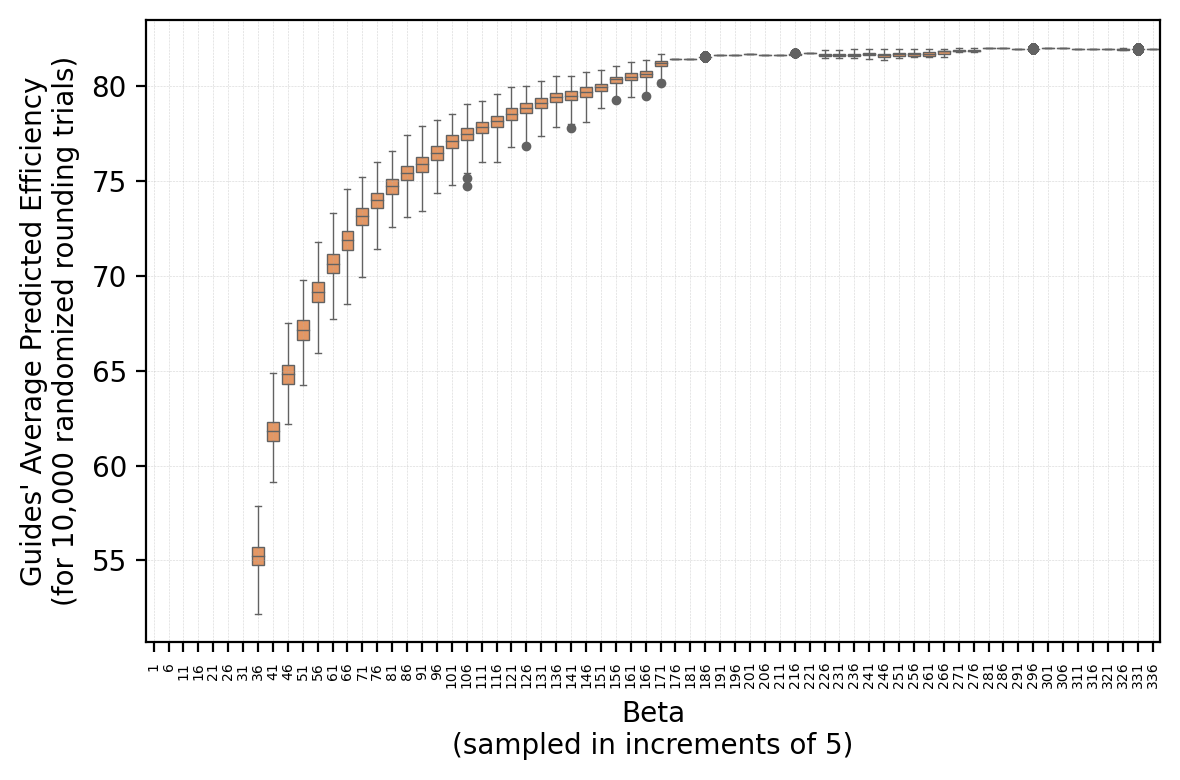

In [6]:
import seaborn as sns

every_ten = df.iloc[::5, :]
every_ten = every_ten.set_index('budget')

plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.autolayout"] = True

plt.xticks(fontsize=5, rotation=90)

ax = sns.boxplot(every_ten.avg_score_over_each_trial.apply(lambda x: pd.Series(x)).T, 
    linewidth=0.5, whis=3,
    flierprops={'marker': '.'}, color='#fa934e')
ax.set(xlabel='Beta\n(sampled in increments of 5)', ylabel='Guides\' Average Predicted Efficiency\n(for 10,000 randomized rounding trials)')
ax.yaxis.grid(linestyle='dotted', linewidth=0.2)
ax.xaxis.grid(linestyle='dotted', linewidth=0.2)

plt.savefig('../data/output/score_vs_beta.png')

<AxesSubplot:xlabel='budget', ylabel='num_non_zero_feasible_under_one'>

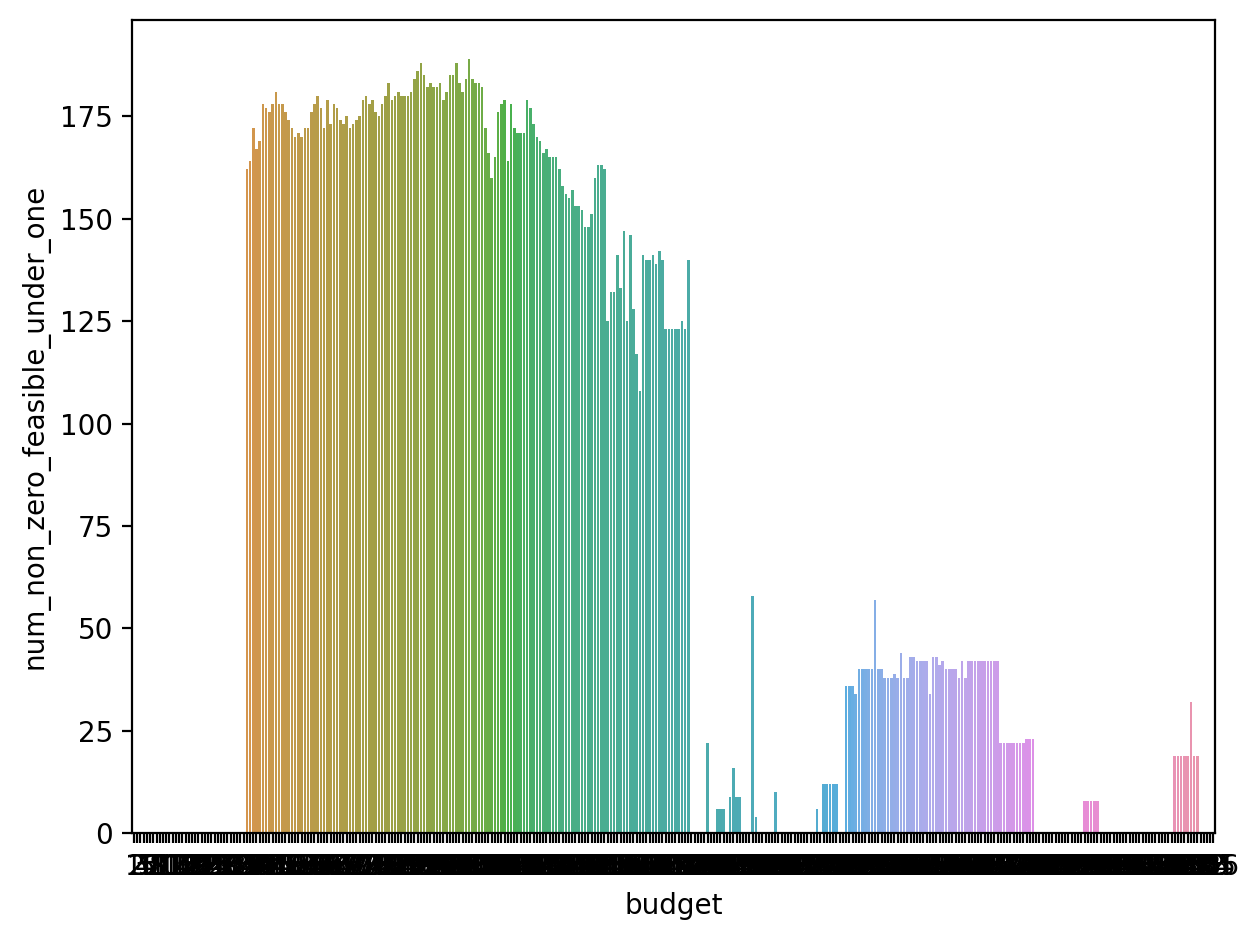

In [220]:
sns.barplot(x=budget, y=df.num_non_zero_feasible_under_one)

<AxesSubplot:xlabel='budget', ylabel='num_non_zero_feasible'>

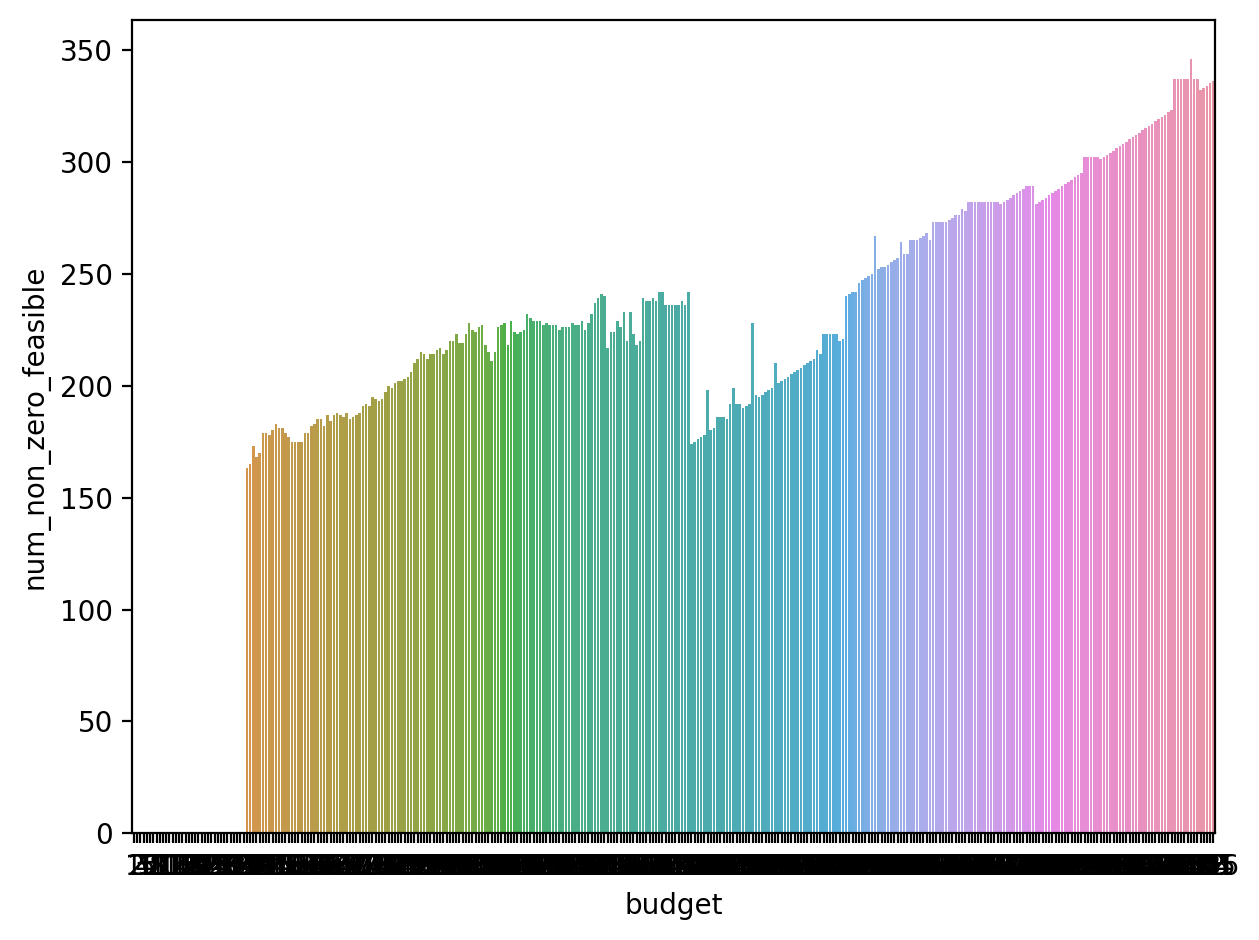

In [221]:
sns.barplot(x=budget, y=df.num_non_zero_feasible)

<AxesSubplot:xlabel='budget'>

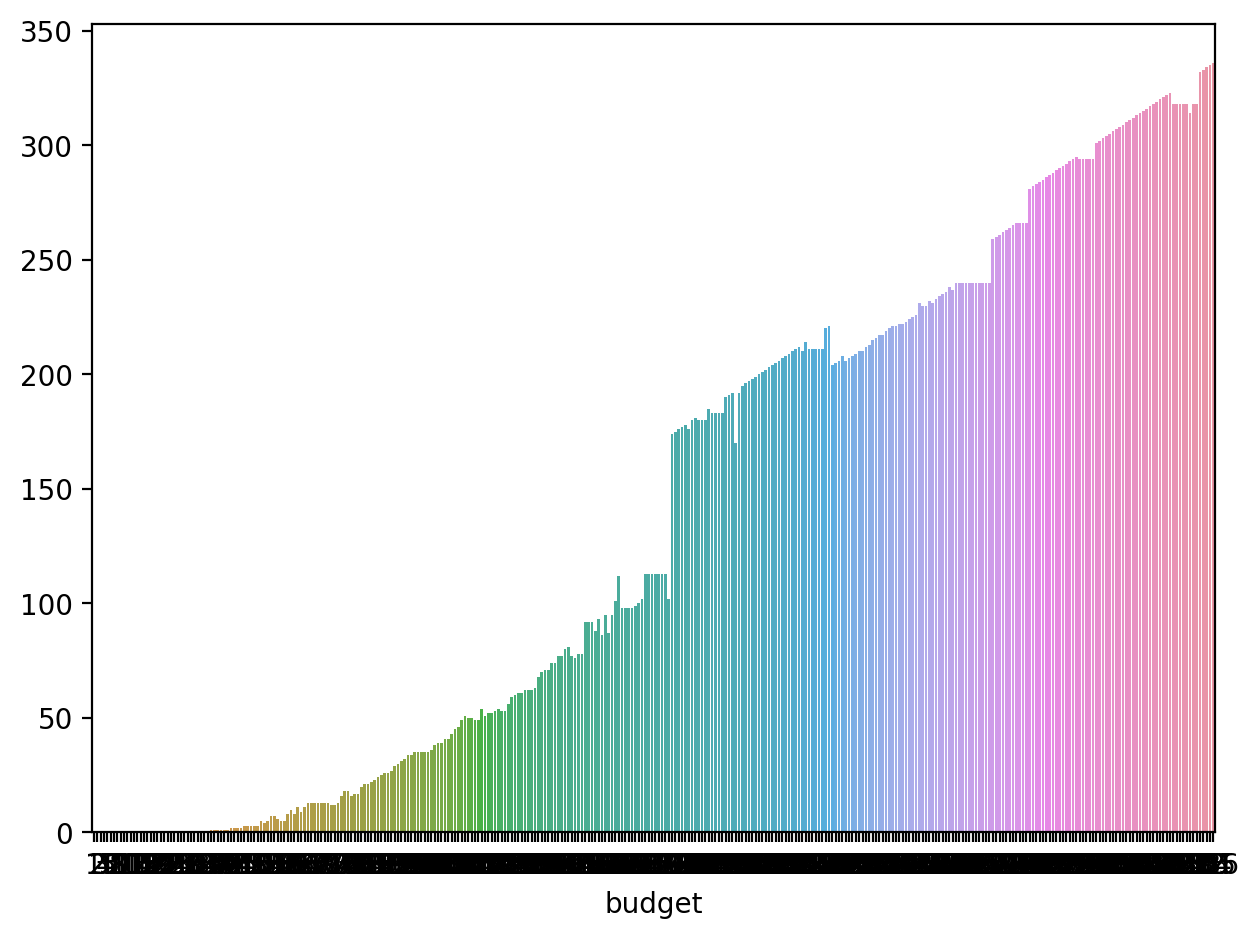

In [222]:
sns.barplot(x=budget, y=(df.num_non_zero_feasible - df.num_non_zero_feasible_under_one))

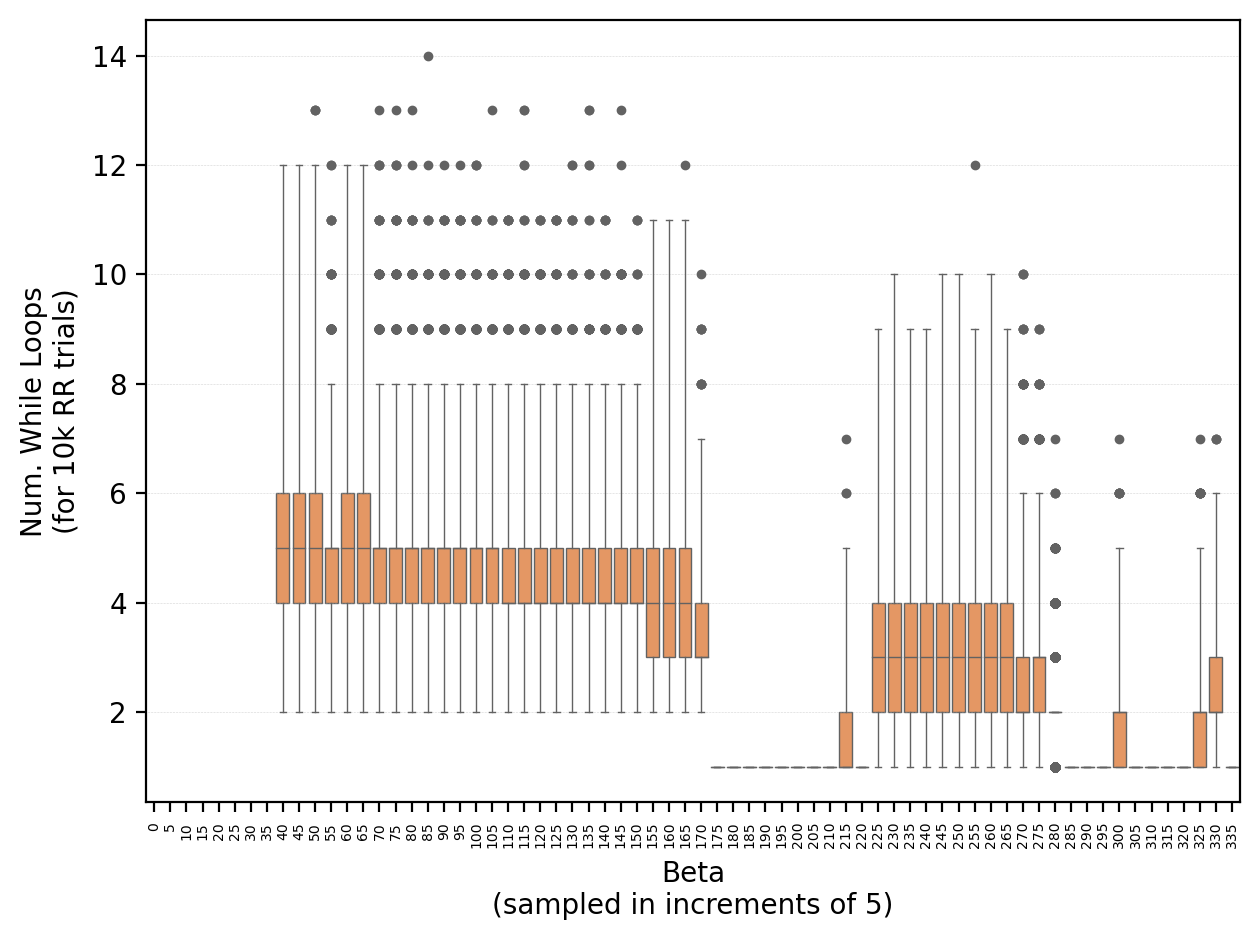

In [23]:
import seaborn as sns

every_ten = df.iloc[::5, :]
every_ten = every_ten.set_index('budget')

plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.autolayout"] = True
# plt.rcParams["figure.figsize"] = (30, 10)
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

plt.xticks(fontsize=5, rotation=90)

ax = sns.boxplot(every_ten.num_while_iters_for_each_trial.apply(lambda x: pd.Series(x)).T, 
    linewidth=0.5, whis=3,
    flierprops={'marker': '.'}, color='#fa934e')
ax.set(xlabel='Beta\n(sampled in increments of 5)', ylabel='Num. While Loops\n(for 10k RR trials)')
ax.yaxis.grid(linestyle='dotted', linewidth=0.2)
#plt.savefig('../data/output/while_vs_beta.png')

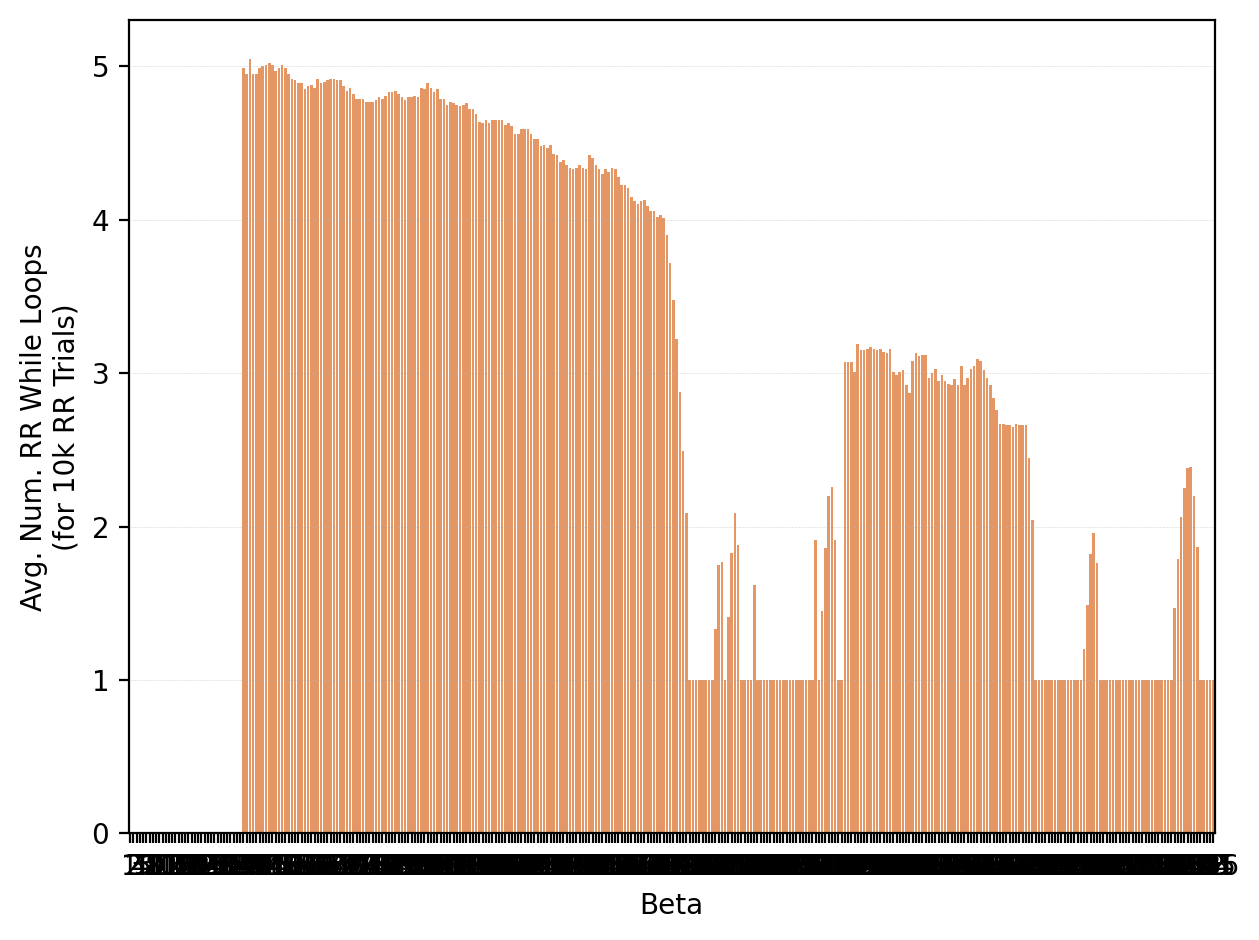

In [167]:
import seaborn as sns

budget = df[df.solved_with_exhaustive == 'No'].budget
num_feasible_under_one = df[df.solved_with_exhaustive == 'No'].avg_num_while_iters_for_n_trials

plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.autolayout"] = True

ax = sns.barplot(x=budget, y=num_feasible_under_one, color='#fa934e')
ax.set(xlabel='Beta', ylabel='Avg. Num. RR While Loops\n(for 10k RR Trials)')
ax.yaxis.grid(linestyle='dotted', linewidth=0.2)

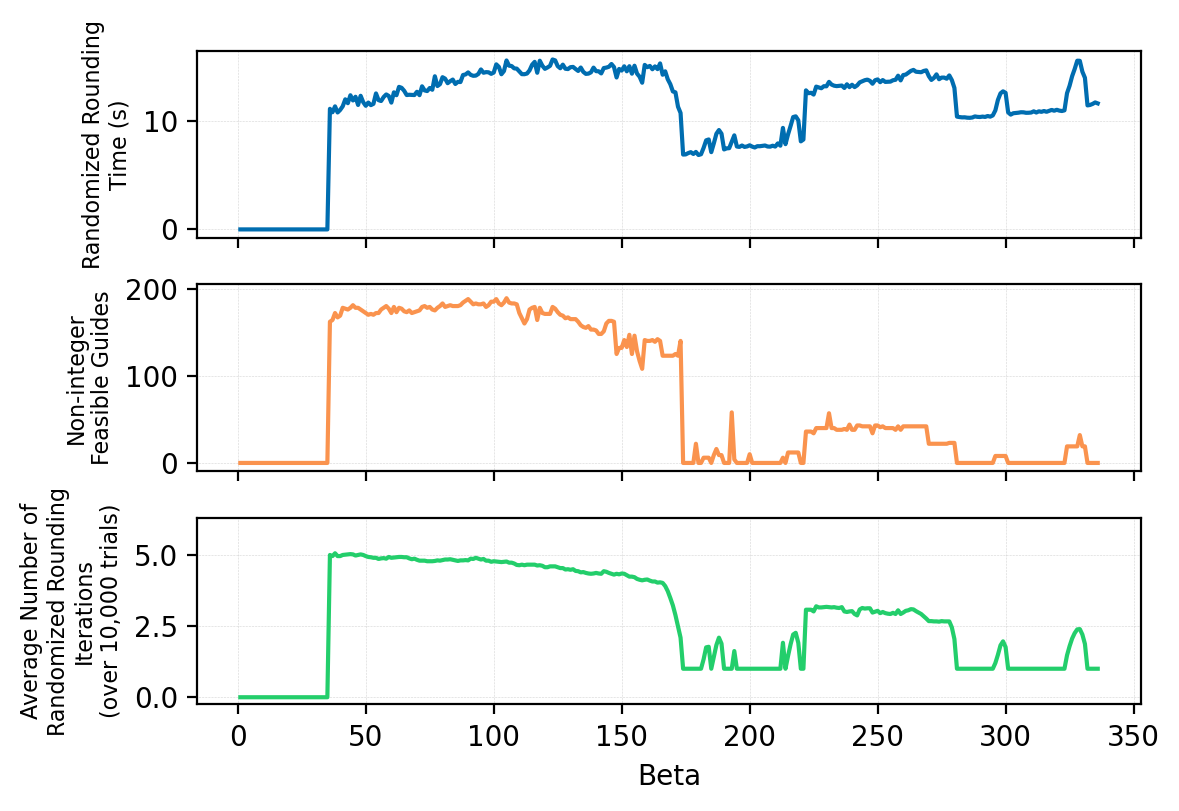

In [31]:
fig, axes = plt.subplots(3, 1, sharex=True)

budget = df[df.solved_with_exhaustive == 'No'].budget
time = df[df.solved_with_exhaustive == 'No'].random_rounding_time
nz = df[df.solved_with_exhaustive == 'No'].num_non_zero_feasible_under_one
avg_while = df[df.solved_with_exhaustive == 'No'].avg_num_while_iters_for_n_trials

sns.lineplot(ax=axes[0], x=budget, y=time, color='#006db0')
axes[0].set_ylabel('Randomized Rounding\nTime (s)', fontsize=8)

sns.lineplot(ax=axes[1], x=budget, y=nz, color='#fa934e')
axes[1].set_ylabel('Non-integer\nFeasible Guides', fontsize=8)

sns.lineplot(ax=axes[2], x=budget, y=avg_while, color='#23CE6B')
axes[2].set_ylabel('Average Number of\nRandomized Rounding\nIterations\n(over 10,000 trials)', fontsize=8)
axes[2].set_xlabel('Beta')

axes[0].set_ylim(-0.7819390181452036, 16.420719381049274)
axes[1].set_ylim(-9.450000000000001, 205)
axes[2].set_ylim(-0.2525, 6.3025)

axes[0].xaxis.grid(linestyle='dotted', linewidth=0.2)
axes[1].xaxis.grid(linestyle='dotted', linewidth=0.2)
axes[2].xaxis.grid(linestyle='dotted', linewidth=0.2)

axes[0].yaxis.grid(linestyle='dotted', linewidth=0.2)
axes[1].yaxis.grid(linestyle='dotted', linewidth=0.2)
axes[2].yaxis.grid(linestyle='dotted', linewidth=0.2)

plt.savefig('../data/output/triple_subplots_vs_beta.png')